# Introduction

This is a home assignment for the role - Data Science. Please follow the instructions:
1. The main goal of this assignment is to analyze/extract topics within a huge corpus.
2. The primary language to use in this exercise is Python (and its auxiliary packages of your choice) on top of Jupyter Notebook.
3. Your code should be research-grade, as detailed below:
    a. The code should be reliable (think of the correctness and edge cases).
    b. The code should be readable and maintainable.
    c. Take (some) memory efficiency into consideration while solving the problem.
    d. The data visualization should be functional enough to support the answers.
4. The solution should be extensible:
    a. Work iteratively within the given time frame to get something before you deepen your research.
    b. Think of the step-by-step implementation.
    c. Being rigorous is important for the maintenance, correctness, and flexibility of the results, but try to be concise and elegant where possible.
5. We value your time. The whole assignment should take roughly 0.5-1 day. If you think it will take longer, please let us know ahead of time.

Good Luck!


# Objective
Analyze a dataset of headlines. First - clean, explore, and tokenize the text. Then, apply common NLP methods used for topic modeling.


---
# Part 1 - Data cleaning and exploration
1. Load the attached dataset using Pandas.
2. Clean and prepare the data for analysis by performing the following tasks:
    a. Remove missing values.
    b. Handle any outliers present in the data.
    c. Convert any non-numeric columns to numeric/date (when possible).
    d. Tokenize / clean to your understanding.
3. Perform an EDA of your choice to help you understand the data.

## Imports

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Constants

In [72]:
# load data
df = pd.read_csv('data-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [73]:
# Convert 'publish_date' column to date
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


## Data Characteristics

In [74]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1244184 non-null  datetime64[ns]
 1   headline_text  1244184 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 19.0+ MB


In [75]:
# a simple check for duplicated rows
duplicated_rows = df.duplicated().sum()

print(f'Number of duplicated rows: {duplicated_rows}')
print(df[df.duplicated()])

# remove duplicated rows
df.drop_duplicates(inplace=True, keep='first')
print(f'Number of rows after duplicated removed: {len(df)}')

Number of duplicated rows: 2
        publish_date                                     headline_text
1232754   2021-03-01  house prices record sharpest increase since 2003
1237050   2021-06-01    house prices reach record levels; as investors
Number of rows after duplicated removed: 1244182


In [76]:
# check for missing values
df.isna().sum()

# Remove missing values
# df.dropna(inplace=True)

publish_date     0
headline_text    0
dtype: int64

^ No need to remove missing values since there are none.

In [77]:
# create 'headline_length' and 'headline_word_count' columns
df['headline_length'] = df['headline_text'].apply(lambda x: len(x))
df['headline_word_count'] = df['headline_text'].apply(lambda x: len(x.split()))
df.head()

,publish_date,headline_text,headline_length,headline_word_count
0,2003-02-19,aba decides against community broadcasting lic...,50,6
1,2003-02-19,act fire witnesses must be aware of defamation,46,8
2,2003-02-19,a g calls for infrastructure protection summit,46,7
3,2003-02-19,air nz staff in aust strike for pay rise,40,9
4,2003-02-19,air nz strike to affect australian travellers,45,7


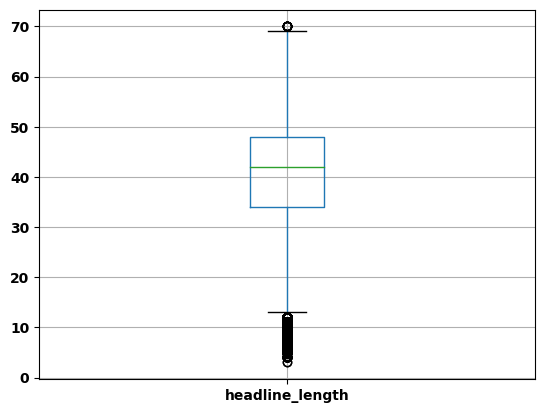

In [91]:
# check for outliers
df[['headline_length']].boxplot()
plt.show()

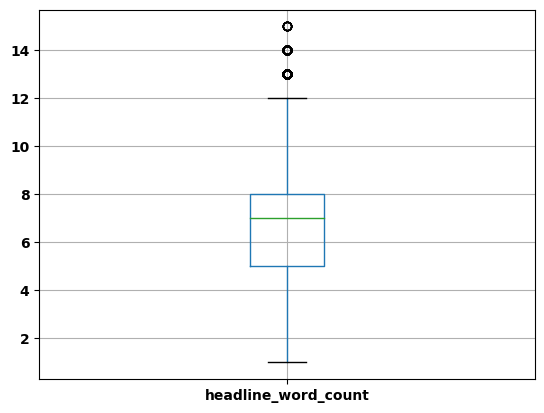

In [104]:
# check for outliers
df[['headline_word_count']].boxplot()
plt.show()

In [98]:
df[df['headline_length'] < 10]

,publish_date,headline_text,headline_length,headline_word_count
904,2003-02-23,nataus,6,1
2054,2003-02-28,natwa,5,1
3395,2003-03-06,test test,9,2
7219,2003-03-25,sptcri,6,1
7220,2003-03-25,sptrby,6,1
...,...,...,...,...
1241426,2021-10-11,4cs,3,1
1241908,2021-10-25,dance,5,1
1242107,2021-10-31,done deal,9,2
1242324,2021-11-07,jaccuse,7,1


In [107]:
df[df['headline_word_count'] < 2]

,publish_date,headline_text,headline_length,headline_word_count
904,2003-02-23,nataus,6,1
2054,2003-02-28,natwa,5,1
7219,2003-03-25,sptcri,6,1
7220,2003-03-25,sptrby,6,1
7635,2003-03-27,nattas,6,1
...,...,...,...,...
1240439,2021-09-12,dithering,9,1
1241426,2021-10-11,4cs,3,1
1241908,2021-10-25,dance,5,1
1242324,2021-11-07,jaccuse,7,1


In [ ]:
# b. Handle any outliers present in the data.
# d. Tokenize / clean to your understanding.

## EDA

---
# Part 2 - Topic modeling
Attempt at least one topic modeling method of your choice to cluster the headlines into topics.
1. Since we cannot determine the number of topics in advance, experiment sensibly to assess a reasonable amount of topics.
2. Devise a method (either computationally, graphically, or both) to decide about the number of topics, and then match headlines to topics.
3. Try to estimate somehow the matching error.

---
# Part 3 - Bonus
Compare the method with an additional topic modeling method.